# 5_Mastering_Dependency_Injection

Welcome to your complete guide on **Dependency Injection (DI)** in **Spring Boot**! Let’s dive into what DI is, how it works, and how it helps us write better, testable, and maintainable code. 🚀

---

## 💡 What is Dependency Injection?

Dependency Injection is a **design pattern** in which an object receives other objects it depends on. Instead of creating dependencies directly, they are **injected** from outside.

✅ **Main Benefits:**

* Loosely coupled code 🔄
* Easier unit testing 🧪
* Adheres to SOLID principles 💎


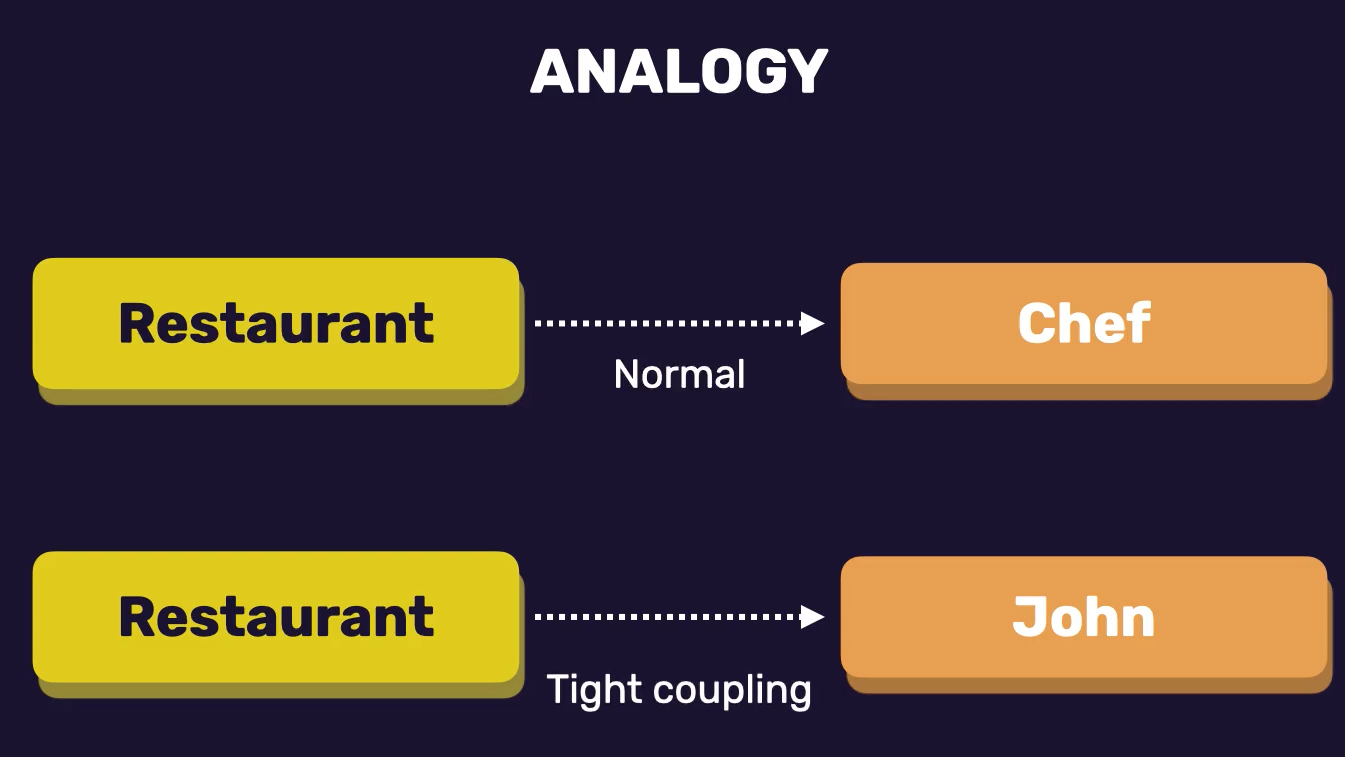

---

## 🚫 The Problem with Tight Coupling

### Code: `OrderService` using `StripePaymentService` directly

```java
package com.codewithsithum.store;

public class OrderService {
    public void placeOrder(){
        var paymentService = new StripePaymentService();
        paymentService.processPayment(10);
    }
}
```

```java
package com.codewithsithum.store;

public class StripePaymentService {
    public void processPayment(double amount){
        System.out.println("STRIPE");
        System.out.println("Amount: " + amount);
    }
}
```

❗ **Why is this bad?**

* `OrderService` **cannot work without** `StripePaymentService`
* Hard to **test OrderService** independently 😖
* Violates the **Open/Closed Principle** (explained below)

---

## 💼 Solution: Use an Interface

📍 Refactor `StripePaymentService`: Right-click ➡️ Refactor ➡️ Extract Interface ➡️ Name it `PaymentService`

### `PaymentService.java`

```java
package com.codewithsithum.store;

public interface PaymentService {
    void processPayment(double amount);
}
```

### `StripePaymentService.java` (after implementing interface)

```java
package com.codewithsithum.store;

public class StripePaymentService implements PaymentService {
    @Override
    public void processPayment(double amount){
        System.out.println("STRIPE");
        System.out.println("Amount: " + amount);
    }
}
```



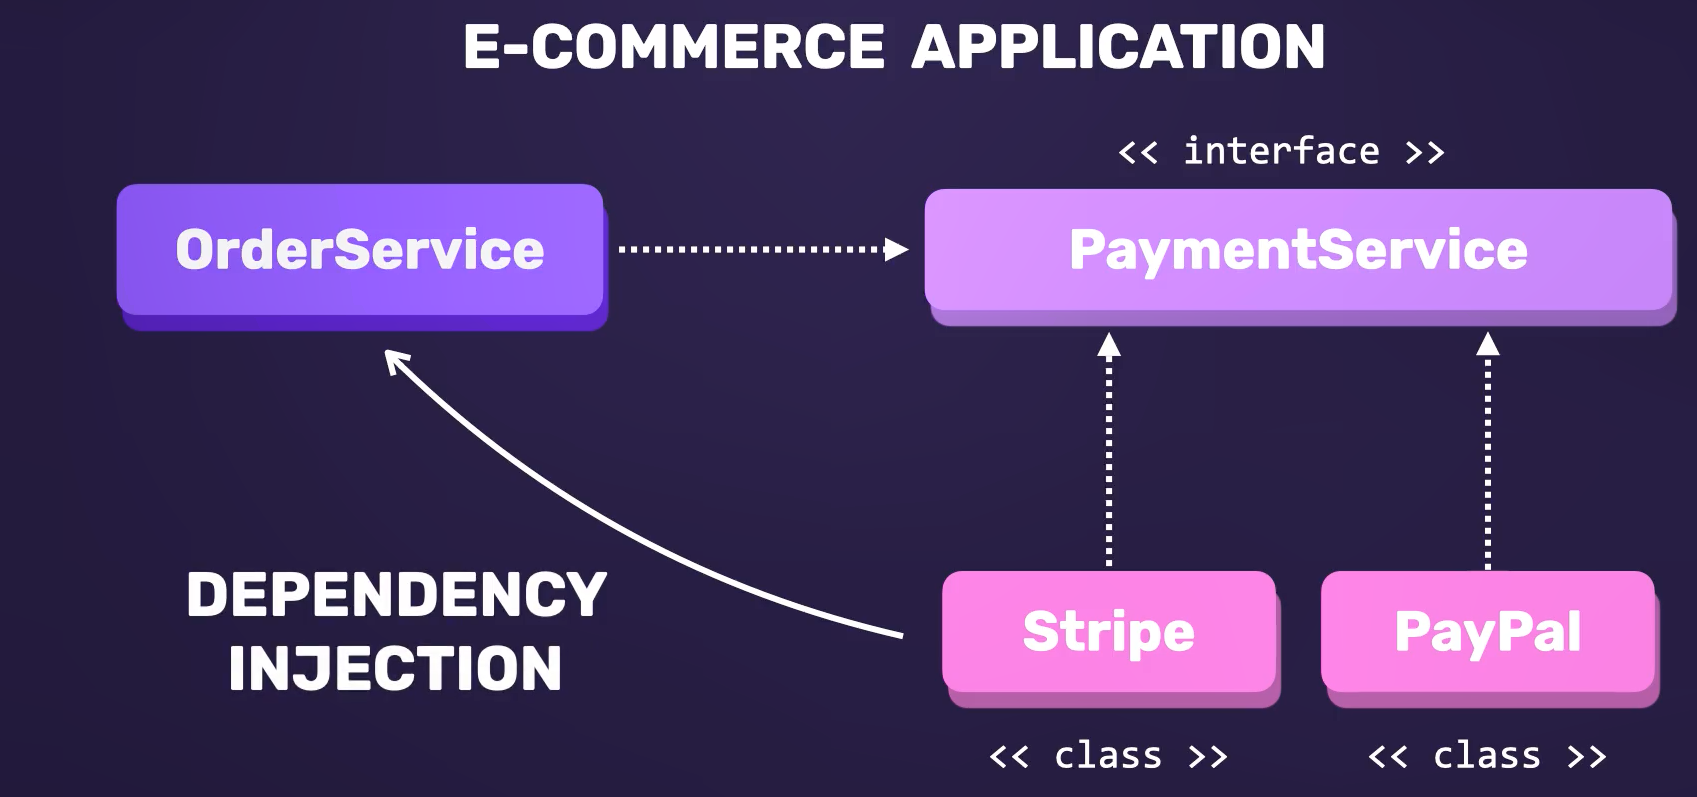
---

## 🔌 1) Constructor Injection

The dependency is provided through the constructor.

### `OrderService.java`

```java
package com.codewithsithum.store;

public class OrderService {

    private PaymentService paymentService;

    public OrderService(PaymentService paymentService){
        this.paymentService = paymentService;
    }

    public void placeOrder(){
        paymentService.processPayment(10);
    }
}
```

### Add Another Payment Option: `PaypalPaymentService.java`

```java
package com.codewithsithum.store;

public class PaypalPaymentService implements PaymentService{
    @Override
    public void processPayment(double amount) {
        System.out.println("Paypal");
        System.out.println("Amount: " + amount);
    }
}
```

### `StoreApplication.java` (Manually injecting Stripe)

```java
package com.codewithsithum.store;

import org.springframework.boot.SpringApplication;
import org.springframework.boot.autoconfigure.SpringBootApplication;

@SpringBootApplication
public class StoreApplication {

    public static void main(String[] args) {
        //SpringApplication.run(StoreApplication.class, args);
        var orderService = new OrderService(new StripePaymentService());
        orderService.placeOrder();
    }
}
```

### 🧠 Open/Closed Principle

* **Open for extension:** We can add new payment methods like PayPal ✅
* **Closed for modification:** We don’t touch existing `OrderService` code ❌

---

## 🔧 2) Setter Injection

Another way to inject dependency is through a setter method.

### `OrderService.java`

```java
package com.codewithsithum.store;

public class OrderService {

    private PaymentService paymentService;

    public void placeOrder(){
        paymentService.processPayment(10);
    }

    public void setPaymentService(PaymentService paymentService) {
        this.paymentService = paymentService;
    }
}
```

### `StoreApplication.java` (Using PayPal this time)

```java
package com.codewithsithum.store;

import org.springframework.boot.SpringApplication;
import org.springframework.boot.autoconfigure.SpringBootApplication;

@SpringBootApplication
public class StoreApplication {

    public static void main(String[] args) {
        //SpringApplication.run(StoreApplication.class, args);
        var orderService = new OrderService();
        orderService.setPaymentService(new PaypalPaymentService());
        orderService.placeOrder();
    }
}
```

---

## 🏁 Summary

✅ Constructor Injection

✅ Setter Injection

✅ Decoupling with interfaces

✅ Adheres to Open/Closed Principle

🎉 Now your code is more flexible, testable, and maintainable!

👉 In future steps, you can let **Spring Boot manage DI automatically** using `@Component`, `@Autowired`, and `@Service`. Stay tuned for that guide!
